<a href="https://colab.research.google.com/github/ManglaSharma/Disaster-Segmentation-/blob/main/DisasterSegmentationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Set image and mask directories
image_dir = '/content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/image'
mask_dir = '/content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/mask'

# Match image–mask pairs using filenames
image_mask_pairs = []
for img_name in os.listdir(image_dir):
    if img_name.endswith('.jpg'):
        base_name = os.path.splitext(img_name)[0]  # e.g., '9000'
        mask_name = base_name + '_lab.png'
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, mask_name)
        if os.path.exists(mask_path):
            image_mask_pairs.append((img_path, mask_path))

# Show some stats
print(f"Total matched image–mask pairs: {len(image_mask_pairs)}")
print("Sample pair:", image_mask_pairs[0])



Total matched image–mask pairs: 51
Sample pair: ('/content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/image/6615.jpg', '/content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/mask/6615_lab.png')


In [ ]:
# From previous step:
# image_mask_pairs = [(img_path1, mask_path1), (img_path2, mask_path2), ...]

# Split into two aligned lists
image_paths = [pair[0] for pair in image_mask_pairs]
mask_paths = [pair[1] for pair in image_mask_pairs]

# Confirm alignment
for i in range(3):
    print(f"Image: {image_paths[i]}")
    print(f"Mask : {mask_paths[i]}\n")


Image: /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/image/6615.jpg
Mask : /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/mask/6615_lab.png

Image: /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/image/9000.jpg
Mask : /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/mask/9000_lab.png

Image: /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/image/8379.jpg
Mask : /content/drive/MyDrive/disastersegmentation_dataset/Train/Labeled/Flooded/mask/8379_lab.png



In [ ]:
"""import matplotlib.pyplot as plt
import cv2

# Show 3 random samples
for i in range(3):
    # Load image and mask
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_paths[i], cv2.IMREAD_GRAYSCALE)

    # Plot image and mask side by side
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
"""

'import matplotlib.pyplot as plt\nimport cv2\n\n# Show 3 random samples\nfor i in range(3):\n    # Load image and mask\n    img = cv2.imread(image_paths[i])\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    mask = cv2.imread(mask_paths[i], cv2.IMREAD_GRAYSCALE)\n\n    # Plot image and mask side by side\n    plt.figure(figsize=(10, 4))\n\n    plt.subplot(1, 2, 1)\n    plt.imshow(img)\n    plt.title("Image")\n    plt.axis("off")\n\n    plt.subplot(1, 2, 2)\n    plt.imshow(mask, cmap=\'gray\')\n    plt.title("Mask")\n    plt.axis("off")\n\n    plt.tight_layout()\n    plt.show()\n'

In [ ]:
from sklearn.model_selection import train_test_split

# First split: Train vs Temp (Val + Test)
train_images, temp_images, train_masks, temp_masks = train_test_split(
    image_paths, mask_paths, test_size=0.2, random_state=42)

# Second split: Validation vs Test (split remaining 20%)
val_images, test_images, val_masks, test_masks = train_test_split(
    temp_images, temp_masks, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Train size: {len(train_images)}")
print(f"Validation size: {len(val_images)}")
print(f"Test size: {len(test_images)}")


Train size: 40
Validation size: 5
Test size: 6


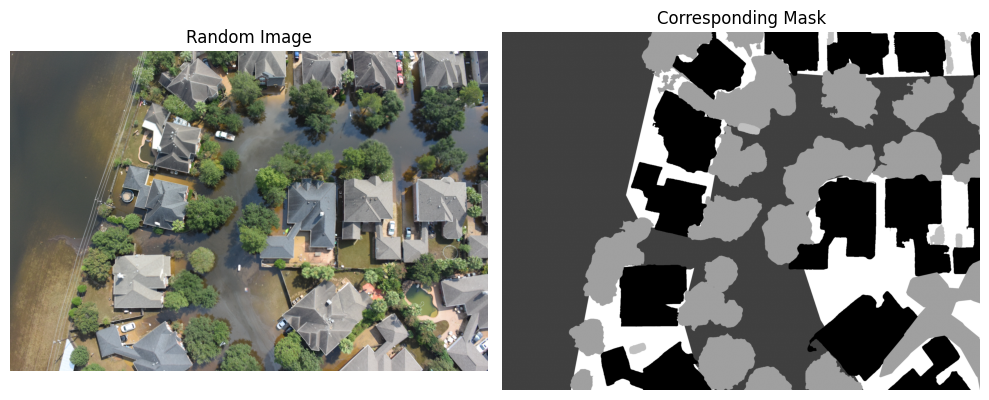

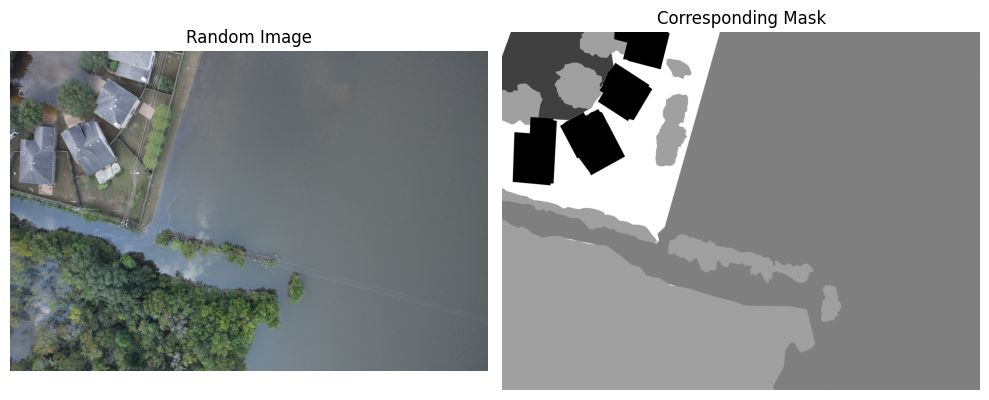

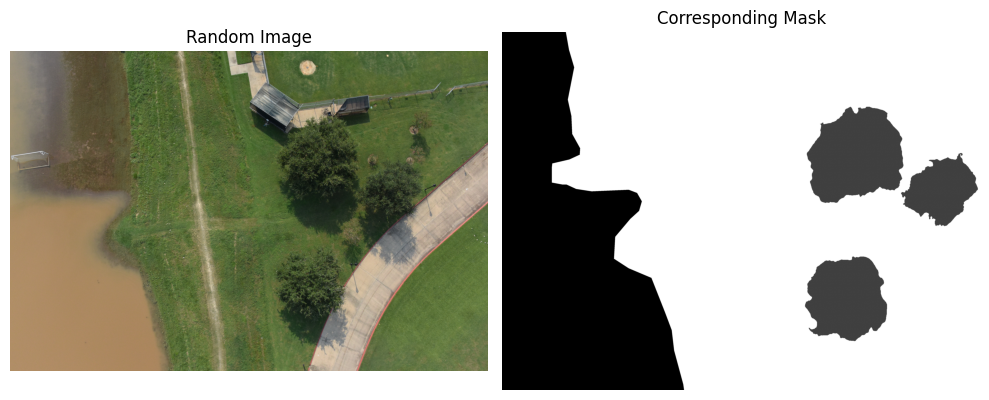

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

# Select 3 random samples from the full dataset
sample_indices = random.sample(range(len(image_paths)), 3)

for idx in sample_indices:
    img = cv2.imread(image_paths[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_paths[idx], cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Random Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Corresponding Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
inconsistent_shapes = []

for img_path, mask_path in zip(image_paths, mask_paths):
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if img.shape[:2] != mask.shape[:2]:
        inconsistent_shapes.append((img_path, mask_path, img.shape, mask.shape))

# Output results
if inconsistent_shapes:
    print(f"Inconsistent pairs found: {len(inconsistent_shapes)}")
    for i, (img, msk, img_shape, mask_shape) in enumerate(inconsistent_shapes[:5]):
        print(f"{i+1}. Image: {img_shape}, Mask: {mask_shape}")
else:
    print("✅ All image–mask pairs have consistent shapes.")


Inconsistent pairs found: 42
1. Image: (3072, 4592, 3), Mask: (3000, 4000)
2. Image: (3072, 4592, 3), Mask: (3000, 4000)
3. Image: (3072, 4592, 3), Mask: (3000, 4000)
4. Image: (3072, 4592, 3), Mask: (3000, 4000)
5. Image: (3072, 4592, 3), Mask: (3000, 4000)


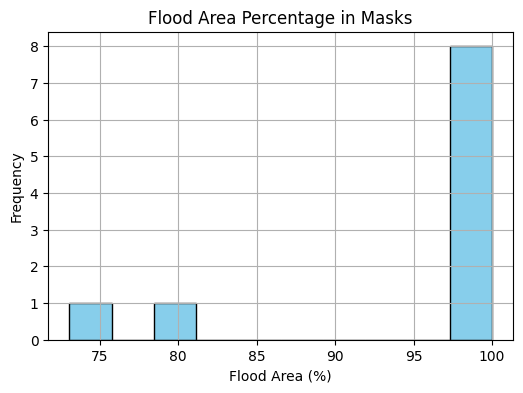

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Analyze first 10 masks (you can change this number)
flood_percentages = []

for mask_path in mask_paths[:10]:
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    total_pixels = mask.size
    flood_pixels = np.count_nonzero(mask)
    flood_percentage = (flood_pixels / total_pixels) * 100
    flood_percentages.append(flood_percentage)

# Plot histogram of flood area %
plt.figure(figsize=(6,4))
plt.hist(flood_percentages, bins=10, color='skyblue', edgecolor='black')
plt.title("Flood Area Percentage in Masks")
plt.xlabel("Flood Area (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
from torch.utils.data import Dataset
import torchvision.transforms as T
from PIL import Image

class FloodDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None, target_size=(512, 512)):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        img = Image.open(self.image_paths[idx]).convert("RGB")
        mask = Image.open(self.mask_paths[idx]).convert("L")

        # Resize both to target size
        img = img.resize(self.target_size)
        mask = mask.resize(self.target_size)

        # Apply image transform (e.g., normalization) if provided
        if self.transform:
            img = self.transform(img)

        # Convert mask to tensor manually
        mask = T.ToTensor()(mask)
        mask = (mask > 0).float()  # Binarize: 0 or 1

        return img, mask


In [ ]:
import torchvision.transforms as T

# Define normalization (ImageNet stats)
image_transforms = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],  # RGB means
                std=[0.229, 0.224, 0.225])   # RGB stds
])


In [ ]:
train_dataset = FloodDataset(train_images, train_masks, transform=image_transforms)
val_dataset = FloodDataset(val_images, val_masks, transform=image_transforms)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

Train dataset size: 40
Validation dataset size: 5


In [ ]:
import torchvision.transforms as T

# Augmentations for training
train_transform = T.Compose([
    T.RandomHorizontalFlip(p=0.5),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

# No augmentations for validation/test
val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])


In [ ]:
train_dataset = FloodDataset(train_images, train_masks, transform=train_transform)
val_dataset = FloodDataset(val_images, val_masks, transform=val_transform)


In [ ]:
# Check shape of one sample
img, mask = train_dataset[0]

print(f"Image shape: {img.shape}")   # Should be [3, 512, 512]
print(f"Mask shape: {mask.shape}")   # Should be [1, 512, 512]


Image shape: torch.Size([3, 512, 512])
Mask shape: torch.Size([1, 512, 512])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 3, padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, 3, padding=1),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True)
            )

        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(2, 2)

        self.bottleneck = conv_block(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = conv_block(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(self.pool(e1))
        e3 = self.encoder3(self.pool(e2))
        e4 = self.encoder4(self.pool(e3))

        # Bottleneck
        b = self.bottleneck(self.pool(e4))

        # Decoder
        d4 = self.upconv4(b)
        d4 = self.decoder4(torch.cat([d4, e4], dim=1))
        d3 = self.upconv3(d4)
        d3 = self.decoder3(torch.cat([d3, e3], dim=1))
        d2 = self.upconv2(d3)
        d2 = self.decoder2(torch.cat([d2, e2], dim=1))
        d1 = self.upconv1(d2)
        d1 = self.decoder1(torch.cat([d1, e1], dim=1))

        return torch.sigmoid(self.final_conv(d1))


In [ ]:
!pip install -q segmentation-models-pytorch


In [ ]:
import segmentation_models_pytorch as smp

# Define the model
model = smp.Unet(
    encoder_name="resnet34",        # Choose encoder
    encoder_weights="imagenet",     # Use ImageNet pretrained weights
    in_channels=3,                  # RGB images
    classes=1,                      # Binary mask
    activation=None                 # We'll apply sigmoid manually during training
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [ ]:
import torch

# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set up optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
!pip install -q torchmetrics


In [ ]:
import segmentation_models_pytorch as smp

# Define Focal Loss
loss_fn = smp.losses.FocalLoss(mode='binary', alpha=0.8, gamma=2.0)

In [ ]:
import torch
import segmentation_models_pytorch as smp
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
model = smp.Unet(
    encoder_name='resnet34',
    encoder_weights='imagenet',
    in_channels=3,
    classes=1,
)
model.to(device)

# Loss function
loss_fn = smp.losses.FocalLoss(mode='binary', alpha=0.8, gamma=2.0)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Metrics
def compute_metrics(preds, targets):
    preds = (preds > 0.5).float()
    smooth = 1e-6
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum()
    dice = (2 * intersection + smooth) / (union + smooth)
    iou = (intersection + smooth) / ((preds + targets - preds * targets).sum() + smooth)
    return dice.item(), iou.item()

# Loaders (assuming train_dataset and val_dataset already defined)
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training loop with saving
best_val_loss = float('inf')
num_epochs = 5

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # -------- Training --------
    model.train()
    train_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc='Training', leave=False)
    for images, masks in train_loader_tqdm:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=loss.item())
    avg_train_loss = train_loss / len(train_loader)

    # -------- Validation --------
    model.eval()
    val_loss = 0.0
    total_dice, total_iou = 0.0, 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, masks)
            val_loss += loss.item()
            preds = torch.sigmoid(outputs)
            dice, iou = compute_metrics(preds, masks)
            total_dice += dice
            total_iou += iou
    avg_val_loss = val_loss / len(val_loader)
    avg_dice = total_dice / len(val_loader)
    avg_iou = total_iou / len(val_loader)

    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Dice: {avg_dice:.4f} | IoU: {avg_iou:.4f}")

    # -------- Save best model --------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print(" Model saved!")

print(" Training complete.")



Epoch 1/5


Train Loss: 0.1664 | Val Loss: 0.1435 | Dice: 0.6269 | IoU: 0.4566
 Model saved!

Epoch 2/5


Train Loss: 0.1298 | Val Loss: 0.1291 | Dice: 0.6934 | IoU: 0.5307
 Model saved!

Epoch 3/5


Train Loss: 0.1061 | Val Loss: 0.1156 | Dice: 0.7625 | IoU: 0.6162
 Model saved!

Epoch 4/5


Train Loss: 0.0894 | Val Loss: 0.1033 | Dice: 0.8287 | IoU: 0.7075
 Model saved!

Epoch 5/5


Train Loss: 0.0773 | Val Loss: 0.0893 | Dice: 0.8793 | IoU: 0.7846
 Model saved!
 Training complete.


In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
import matplotlib.pyplot as plt
import random
import torch
import numpy as np
import torchvision.transforms as T
from PIL import Image

# Assuming test_dataset is defined in a previous cell (e.g., cell bVelkSSkXSnO)
# If not, uncomment and run the following lines to define it:
# test_dataset = FloodDataset(test_images, test_masks, transform=val_transform)


# Pick random test samples to visualize
num_samples = 3
indices = random.sample(range(len(test_dataset)), num_samples)

model.eval()
for idx in indices:
    img, true_mask = test_dataset[idx]
    img_input = img.unsqueeze(0).to(device)

    with torch.no_grad():
        pred_mask = model(img_input)
        pred_mask = torch.sigmoid(pred_mask)
        pred_mask = (pred_mask > 0.5).float()

    img_np = img.permute(1, 2, 0).cpu().numpy()
    # Denormalize image for plotting
    mean = np.array([0.485, 0.456, 0.406]).reshape((1, 1, 3))
    std = np.array([0.229, 0.224, 0.225]).reshape((1, 1, 3))
    img_np = img_np * std + mean
    img_np = np.clip(img_np, 0, 1) # Clip values to be between 0 and 1 for plotting

    true_mask_np = true_mask.squeeze().cpu().numpy()
    pred_mask_np = pred_mask.squeeze().cpu().numpy()

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_np)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(true_mask_np, cmap="gray")
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask_np, cmap="gray")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
model.to(device)

# Create test DataLoader
from torch.utils.data import DataLoader
# Create test dataset (assuming test_images and test_masks are defined)
test_dataset = FloodDataset(test_images, test_masks, transform=val_transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Evaluation function
def evaluate_on_test(model, loader):
    total_dice, total_iou = 0, 0
    model.eval()
    with torch.no_grad():
        for imgs, masks in loader:
            imgs, masks = imgs.to(device), masks.to(device)
            logits = model(imgs)
            preds = torch.sigmoid(logits)
            preds = (preds > 0.5).float()

            dice, iou = compute_metrics(preds, masks)
            total_dice += dice
            total_iou += iou

    avg_dice = total_dice / len(loader)
    avg_iou = total_iou / len(loader)
    return avg_dice, avg_iou

# Run test evaluation
test_dice, test_iou = evaluate_on_test(model, test_loader)
print(f"\n📊 Test Dice Score: {test_dice:.4f}")
print(f"📊 Test IoU Score: {test_iou:.4f}")

In [ ]:
print("Max prediction:", pred.max().item(), "Min:", pred.min().item())


In [ ]:
import os
from PIL import Image

output_dir = "predicted_masks"
os.makedirs(output_dir, exist_ok=True)

model.eval()
for i, (img, _) in enumerate(test_dataset):
    img_input = img.unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(img_input)
        pred = torch.sigmoid(pred).squeeze().cpu().numpy()
        pred = (pred > 0.5).astype("uint8") * 255
    Image.fromarray(pred).save(f"{output_dir}/pred_mask_{i}.png")

print(f"🖼️ Saved predicted masks to {output_dir}/")


In [ ]:
import cv2
import numpy as np

def post_process_mask(mask, min_area=100):
    """
    Apply post-processing to clean segmentation mask.
    - mask: binary mask (0/1)
    - min_area: minimum connected component area to keep
    """
    mask = mask.astype(np.uint8)
    # Remove small objects
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    final_mask = np.zeros_like(mask)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_area:
            final_mask[labels == i] = 1
    return final_mask


In [ ]:
pred_mask_np = post_process_mask(pred_mask_np)


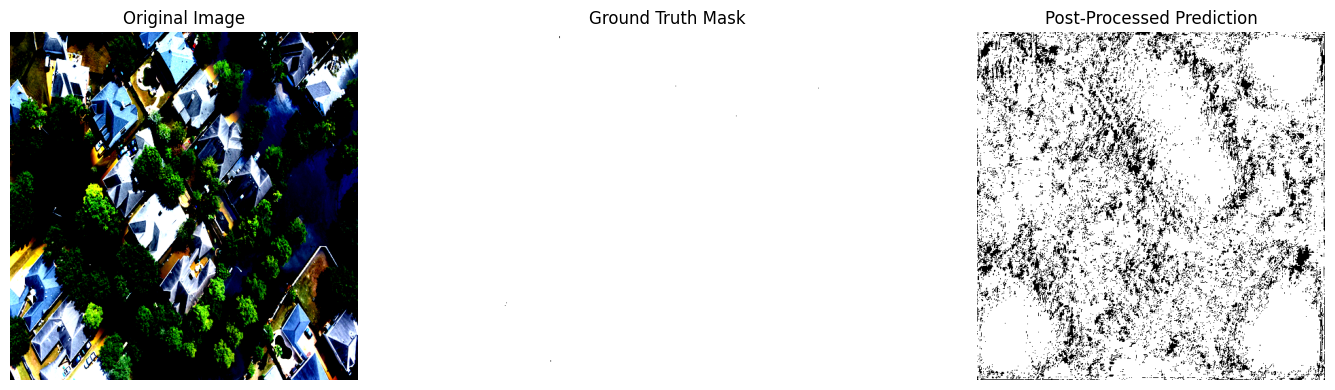

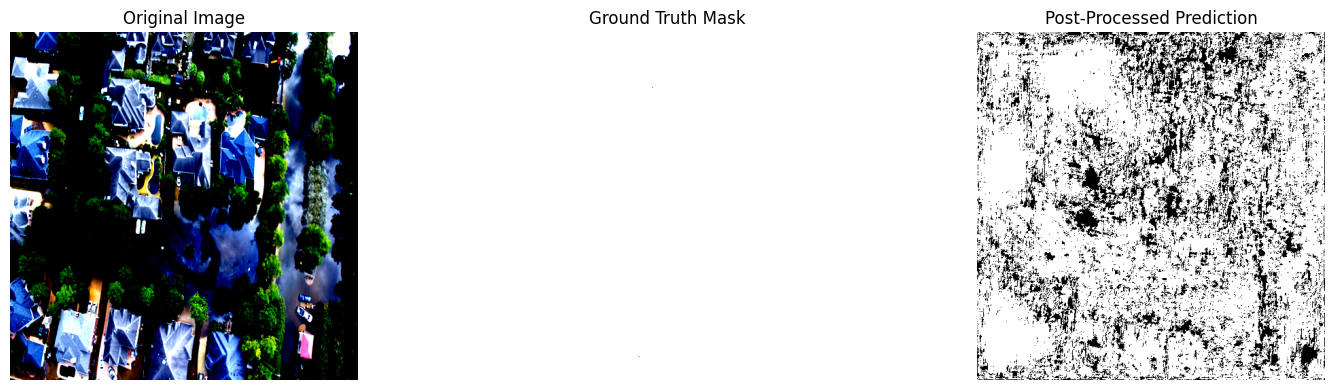

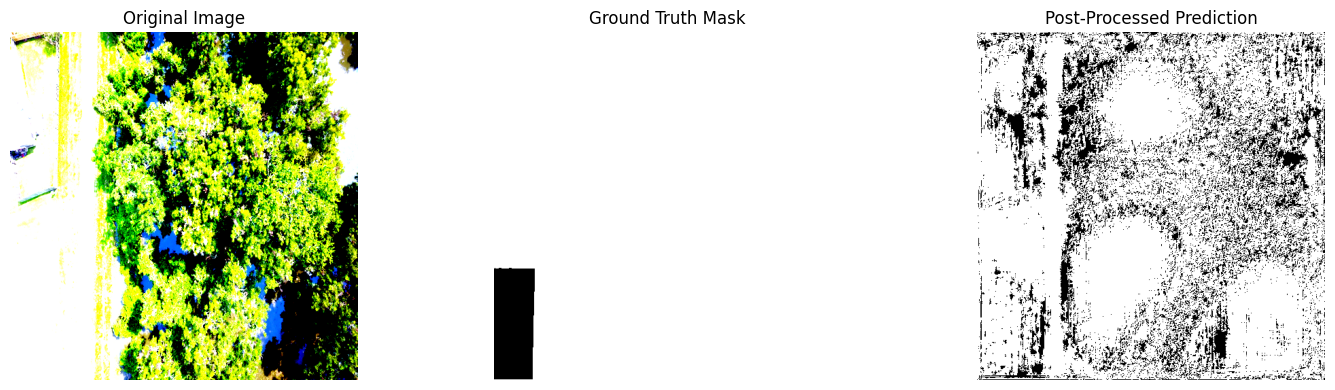

In [ ]:
num_samples = 3
indices = random.sample(range(len(test_dataset)), num_samples)

model.eval()
for idx in indices:
    img, true_mask = test_dataset[idx]
    img_input = img.unsqueeze(0).to(device)

    with torch.no_grad():
        pred_mask = model(img_input)
        pred_mask = torch.sigmoid(pred_mask)
        pred_mask = (pred_mask > 0.5).float()

    img_np = img.permute(1, 2, 0).cpu().numpy()
    true_mask_np = true_mask.squeeze().cpu().numpy()
    pred_mask_np = pred_mask.squeeze().cpu().numpy()
    pred_mask_np = post_process_mask(pred_mask_np)

    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_np)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(true_mask_np, cmap="gray")
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask_np, cmap="gray")
    plt.title("Post-Processed Prediction")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
report_path = "final_report.txt"
with open(report_path, "w") as f:
    f.write("Flood Segmentation Model Report\n")
    f.write("==============================\n")
    f.write(f"Test Dice Score: {avg_dice:.4f}\n")
    f.write(f"Test IoU Score: {avg_iou:.4f}\n")
    f.write("Post-processing applied: connected components filter\n")

print(f"📄 Report saved at {report_path}")
